In [27]:
# label: 1,2,3,4,5
# tranining set: 60
# testing set: 40
# data size: 30 * 13
# x-axis cepstrums
# y-axis frames

# "%" = low energy = 0
# " " = high energy = 1

# 3 lines separated => [30, 33]

# task: overall acc > 80%



In [45]:
%pylab inline
import math
import pickle
import numpy as np
import collections

Populating the interactive namespace from numpy and matplotlib


In [29]:
def readRough(name="training_labels.txt"):
    with open(name) as label:
        labels = []
        for line in label:
            labels.append(line[0])
    return labels

In [30]:
label = readRough()
print (len(label))
class_ = sorted(collections.Counter(label).items())
print (class_)
with open('labelstats.txt', 'wb') as fp:
    pickle.dump(class_, fp)

60
[('1', 12), ('2', 12), ('3', 12), ('4', 12), ('5', 12)]


In [31]:
def inputDigit(name="training_data.txt"):
    with open(name) as digitTxt:
        raw_audio = [list(line)[0:13] for line in digitTxt]
        rows = len(raw_audio)
    return raw_audio

In [32]:
with open ('labelstats.txt', 'rb') as fp:
    class_ = pickle.load(fp)

raw_audio = inputDigit()

# label: 1,2,3,4,5
# index: 0,1,2,3,4

# tranining set: 60
# testing set: 40
# data size: 30 * 13
# x-axis cepstrums
# y-axis frames

# "%" = low energy = 0
# " " = high energy = 1

# 3 lines separated => [30, 33]

# task: overall acc > 80%


training0=np.zeros(shape=(5, 30, 13))   #low
training1=np.zeros(shape=(5, 30, 13))   #high

In [33]:
k = 1
def training(k):
    for i in range(60):
        for row in range(30):
            for col in range(13):
                if raw_audio[i*33 + row][col] == ' ':   #high
                    training1[int(label[i]) - 1][row][col] += 1
                    training0[int(label[i]) - 1][row][col] += 0
                else:
                    training1[int(label[i]) - 1][row][col] += 0
                    training0[int(label[i]) - 1][row][col] += 1

    for i in range(5):
        training1[i] = (training1[i] + k) / (class_[i][1] + k * 2)
        training0[i] = (training0[i] + k) / (class_[i][1] + k * 2)
    #print(training0[0][0])
    #print(training1[0][0])
    return training0, training1


In [34]:
training0, training1 = training(k)

In [35]:
test_rough = inputDigit(name = "testing_data.txt")
def testing(training0, training1):
    
    answer = np.zeros(40)
    for i in range(40):
        test_image = np.zeros(shape=(30,13))
        for row in range(30):
            for col in range(13):
                if test_rough[i*33+row][col] == ' ': #high
                    test_image[row][col] = 1
                else:
                    test_image[row][col] = 0

        posteriori = np.zeros(5)
        for class_num in range(5):
            posteriori[class_num] = math.log(class_[class_num][1])
            for row in range(30):
                for col in range(13):
                    if test_image[row][col] == 0:   #low
                        posteriori[class_num] += math.log(training0[class_num][row][col])
                    else:
                        posteriori[class_num] += math.log(training1[class_num][row][col] )   
        answer[i] = np.argmax(posteriori) + 1

    return answer



In [36]:
answer = testing(training0, training1)

In [37]:
testlabels = readRough("testing_labels.txt")


In [38]:
def confusion_matrix():
    num_each_class = np.zeros(5)
    conf_matrix = np.zeros(shape=(5,5))
    for i in range(40):
        conf_matrix[int(testlabels[i])-1][int(answer[i])-1] += 1
        num_each_class[int(testlabels[i])-1] += 1
            
    for i in range(5):
        for j in range(5):
            conf_matrix[i][j] /= num_each_class[i]
    
    return conf_matrix

In [39]:
conf_matrix = confusion_matrix()
conf_matrix = np.around(conf_matrix, 2)
for row in conf_matrix:
    print(row)
diag_sum = 0
for i in range(5):
    diag_sum += conf_matrix[i][i]
print(diag_sum / 5)

[ 0.88  0.    0.    0.    0.12]
[ 0.  1.  0.  0.  0.]
[ 0.  0.  1.  0.  0.]
[ 0.    0.38  0.    0.62  0.  ]
[ 0.12  0.    0.12  0.    0.75]
0.85


In [ ]:
# Laplace smoothing constant
k1 = np.array([0, 10**(-6), 10**(-5), 10**(-4), 0.001, 0.002, 0.005, 0.01, 0.02, 0.05])
k2 = np.linspace(0.1, 10, 100)
k_grid = np.append(k1, k2)

accuracy = np.zeros(110)

for k_index in range(110):
    k = k_grid[k_index]
    training0, training1 = training(k)
    answer = testing(training0, training1)
    conf_matrix = confusion_matrix()
    conf_matrix = np.around(conf_matrix, 2)
    #for row in conf_matrix:
    #    print(row)
    diag_sum = 0
    for i in range(5):
        diag_sum += conf_matrix[i][i]
    accuracy[k_index] = diag_sum / 5
    print("accuracy =", diag_sum / 5, "when k is ", k_grid[k_index])

accuracy = 0.824 when k is  0.0
accuracy = 0.876 when k is  1e-06
accuracy = 0.876 when k is  1e-05
accuracy = 0.876 when k is  0.0001
accuracy = 0.876 when k is  0.001
accuracy = 0.876 when k is  0.002
accuracy = 0.876 when k is  0.005
accuracy = 0.876 when k is  0.01
accuracy = 0.876 when k is  0.02
accuracy = 0.85 when k is  0.05
accuracy = 0.85 when k is  0.1
accuracy = 0.824 when k is  0.2
accuracy = 0.824 when k is  0.3
accuracy = 0.824 when k is  0.4
accuracy = 0.85 when k is  0.5
accuracy = 0.85 when k is  0.6
accuracy = 0.85 when k is  0.7
accuracy = 0.85 when k is  0.8
accuracy = 0.85 when k is  0.9
accuracy = 0.85 when k is  1.0
accuracy = 0.85 when k is  1.1
accuracy = 0.876 when k is  1.2
accuracy = 0.876 when k is  1.3
accuracy = 0.876 when k is  1.4
accuracy = 0.876 when k is  1.5
accuracy = 0.876 when k is  1.6
accuracy = 0.876 when k is  1.7
accuracy = 0.876 when k is  1.8
accuracy = 0.876 when k is  1.9
accuracy = 0.876 when k is  2.0
accuracy = 0.876 when k is  2.1
a

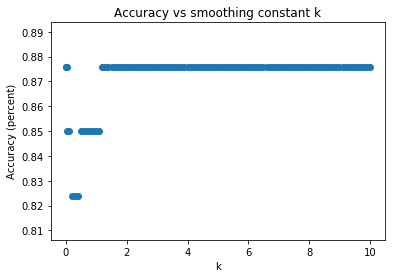

In [46]:
%matplotlib inline
plt.figure()
ax = plt.gca()
#ax.set_xscale('log')
plt.scatter(k_grid[5:], accuracy[5:], label = 'f(x)')
plt.xlabel("k")
plt.ylabel("Accuracy (percent)")
plt.title("Accuracy vs smoothing constant k")